In [35]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
data = data.dropna()
test = test.dropna()

In [8]:
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [9]:
X_train = data.drop(['customer_category','customer_id'],axis=1)

In [10]:
y_train = data['customer_category']

In [12]:
X_train['X1'].unique()

array(['F', 'A', 'BA', 'AA', 'E'], dtype=object)

In [13]:
active_segment_dict = {'AA':1,'A':2,'B':3,'C':4,'D':5}
X1_dict = {'E':1,'AA':2,'A':3,'BA':4,'F':5}

In [14]:
X_train['customer_active_segment'] = X_train['customer_active_segment'].map(active_segment_dict)

In [15]:
X_train['X1'] = X_train['X1'].map(X1_dict)

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
tsne = TSNE()
X_train_sne = tsne.fit_transform(X_train_scaled)

In [33]:
X_train_sne.shape

(10491, 2)

/home/hardik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


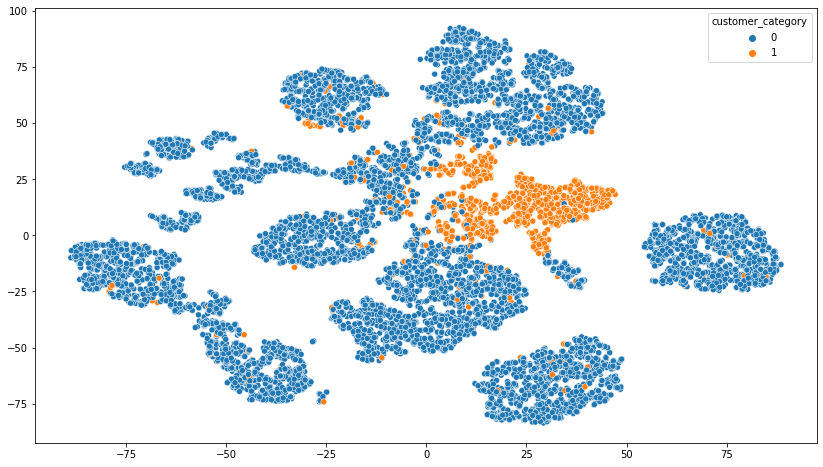

In [34]:
plt.figure(figsize=(14,8))
sns.scatterplot(X_train_sne[:,0],X_train_sne[:,1],hue=y_train)

In [46]:
pca = PCA(n_components=2)

In [47]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [48]:
X_train_pca.shape

(10491, 2)

/home/hardik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


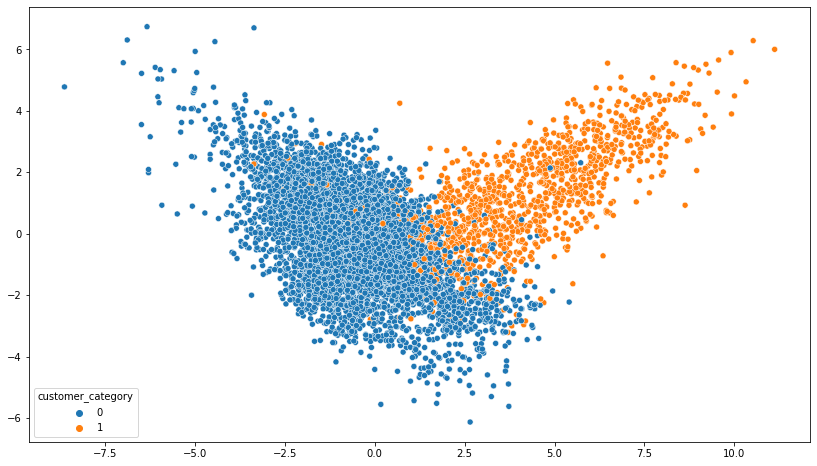

In [49]:
plt.figure(figsize=(14,8))
sns.scatterplot(X_train_pca[:,0],X_train_pca[:,1],hue=y_train)

In [50]:
pca.components_

array([[-0.25872456, -0.15184054,  0.37427704,  0.35301127,  0.33156266,
         0.38597802, -0.3798768 , -0.33032547,  0.18977583,  0.31137888],
       [-0.38383802, -0.34005828,  0.34165984,  0.33080227, -0.10682735,
        -0.19662993,  0.31705953,  0.3613588 ,  0.33229781, -0.34534471]])

In [51]:
pca.explained_variance_ratio_

array([0.4184456 , 0.21205266])